In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor 
from sklearn.metrics import confusion_matrix

In [3]:
data=pd.read_csv(r"C:\Users\DELL\Desktop\heart.csv")
data.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1


In [4]:
real_x=data.iloc[:,[2,3,4,5,6,7,8,9,10,11,12]].values
real_y=data.iloc[:,13].values

In [5]:
training_x,test_x,training_y,test_y=train_test_split(real_x,real_y,test_size=0.3,random_state=0)

In [6]:
scaler=StandardScaler()
training_x=scaler.fit_transform(training_x)
test_x=scaler.fit_transform(test_x)

In [7]:
d_t=DecisionTreeRegressor(random_state=0)
d_t.fit(training_x,training_y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [8]:
y_pred=d_t.predict(test_x)
y_pred

array([0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0.,
       1., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1.,
       1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1.,
       0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0.,
       1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0.,
       1., 1., 1., 0., 1., 0.])

In [9]:
c_m=confusion_matrix(test_y,y_pred)
c_m

array([[31, 13],
       [14, 33]], dtype=int64)

[Text(520.421511627907, 860.7, 'age <= -0.446\nmse = 0.247\nsamples = 212\nvalue = 0.557'),
 Text(297.3837209302325, 770.1, 'oldpeak <= -0.2\nmse = 0.208\nsamples = 102\nvalue = 0.294'),
 Text(183.83720930232556, 679.5, 'slope <= 0.355\nmse = 0.246\nsamples = 48\nvalue = 0.562'),
 Text(86.51162790697674, 588.9000000000001, 'restecg <= 0.328\nmse = 0.164\nsamples = 29\nvalue = 0.793'),
 Text(43.25581395348837, 498.3, 'cp <= 1.237\nmse = 0.052\nsamples = 18\nvalue = 0.944'),
 Text(21.627906976744185, 407.70000000000005, 'mse = 0.0\nsamples = 16\nvalue = 1.0'),
 Text(64.88372093023256, 407.70000000000005, 'fbs <= 0.587\nmse = 0.25\nsamples = 2\nvalue = 0.5'),
 Text(43.25581395348837, 317.1, 'mse = 0.0\nsamples = 1\nvalue = 1.0'),
 Text(86.51162790697674, 317.1, 'mse = 0.0\nsamples = 1\nvalue = 0.0'),
 Text(129.7674418604651, 498.3, 'thalach <= -0.24\nmse = 0.248\nsamples = 11\nvalue = 0.545'),
 Text(108.13953488372093, 407.70000000000005, 'mse = 0.0\nsamples = 4\nvalue = 1.0'),
 Text(151.

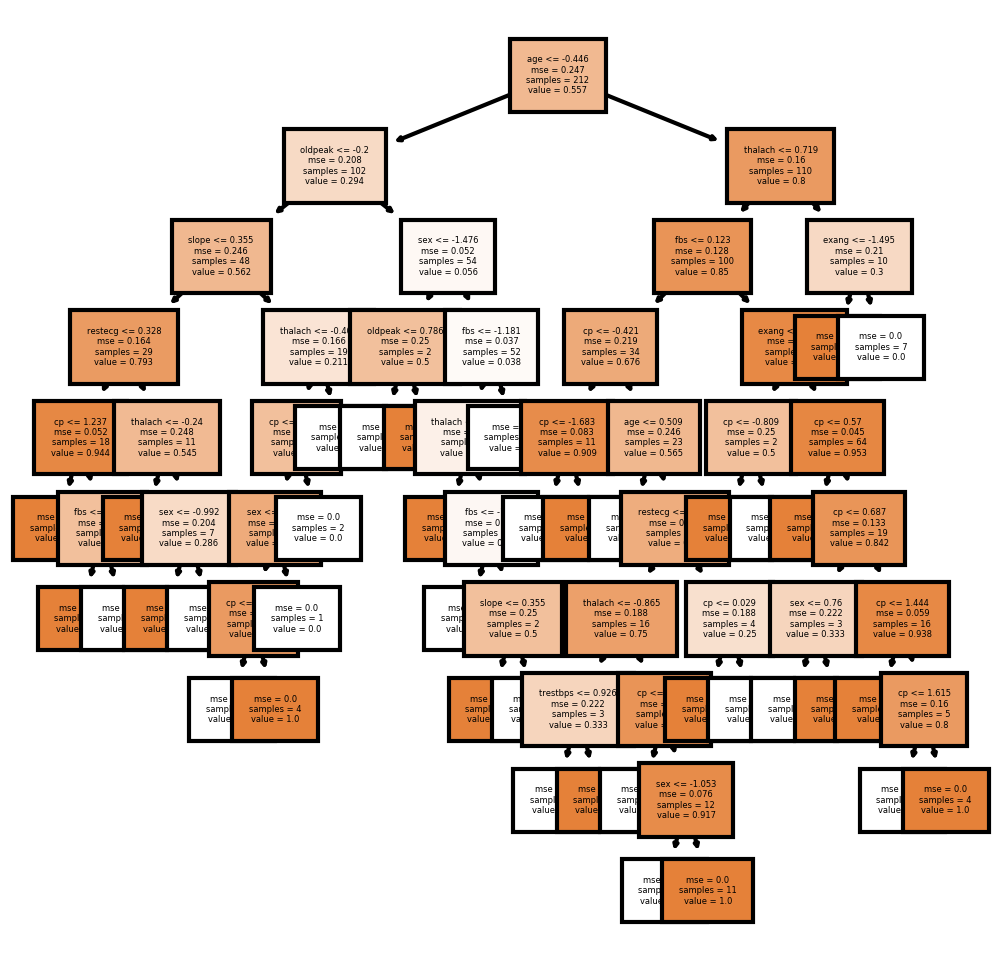

In [10]:
from sklearn import tree
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(4,4),dpi=300)
fn=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']
tree.plot_tree(d_t,feature_names=fn,class_names=['disease present','disease not present'],filled=True,fontsize=2)